# HW3 Binary Classification 

# Logistic Regression and Perceptron

####Please run the cell below to import libraries needed for this HW. Please use the autograd numpy, otherwise you will have issues. Please remember to always use the np library for mathematical functions (e.g., np.log, np.exp, np.sum, etc)

In [35]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt

#### **Q1**) [[5 points]](https://) Implement the sigmod funcation discussed in class. The function takes a value, x, as input and returns the sigmoid function applied to the value.

In [36]:
def sigmoid(x):
    #Your code here
    return (1 / (1 + np.exp(-x)))

#### **Q2**) [[20 points]](https://) Implement the logistic regression model and the cross entropy cost discussed in class. Note that the logistic regression model relies on the sigmoid function (which you have implemented above) and the linear  model (which you have implemented in HW2). You can use the linear model from HW2 for this problem. Similar to the least-squares cost from HW2, the cross entropy cost takes in as input an array of weights, w, an array of x's and an array of ys and return a float indicating the total cost.

In [37]:
#Your linear model from HW2
def model(x,w):
    x = np.array(x)
    w = np.array(w)

    # print(f"Shape of the data: {x.shape}")
    # print(f"Shape of our learnable parameters: {w[1:].shape}")
    # print(f"This shape should be the same size as the data. Computing a scalar for each element in the dataset!: {np.dot(np.transpose(w[1:]), x).shape}")
    # print(w[0] + np.dot(np.transpose(w[1:]), x))
    return w[0] + np.dot(np.transpose(w[1:]), x)

#The logistic regression cross entropy cost
def cross_entropy(w,x,y):
    #Your code here
    x = np.array(x)
    w = np.array(w)
    y = np.array(y)

    predictions = sigmoid(model(x,w))

    return np.mean(-(y * (np.log(predictions)) + (1-y) * (np.log(1 - predictions)))) # remember that we want our loss always to be a scalar function

# MAKE SURE TO BE USING NUMPY OPERATIONS


#### **Q3**) [[2 points]](https://) Run the code below to read a data file. Plot a scatter plot of x vs y.

In [38]:
csvname = '2d_classification_data_v1_entropy.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:]

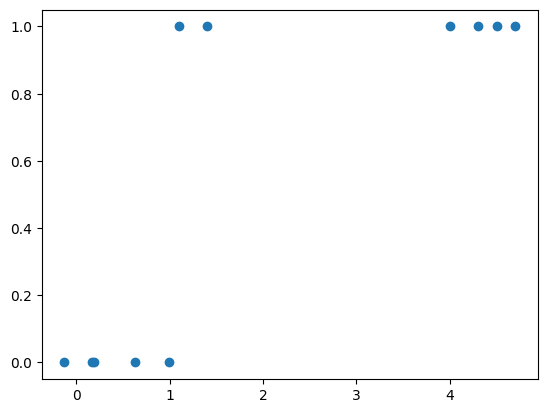

In [39]:
plt.scatter(x,y)

#### **Q4**) [[10 points]](https://) Copy the gradient descent function from HW2. Run the function using the cross_entropy cost and the x and y from above. The parameters should be set to:
`max_its=3000, w=[3.0,3.0], alpha=0.1`.
#### Save the cost and weight history returned by the gradient descent function. Plot the cost history.


In [40]:
def gradient_descent(g,alpha,max_its,w,x,y):
    """
    g is the least squares cost function we are trying to opimize. the cost function is a function (least squares) depends on the input, label, and weights
    """
    
    gradient = grad(g)   ## This is how you use the autograd library to find the gradient of a function  

    theta = w
    weight_history = [theta]
    cost_history = [g(theta,x,y)]

    for _ in range(max_its):
        theta = theta - (alpha * np.array(gradient(theta, x, y)))
        weight_history.append(theta)
        cost_history.append(g(theta,x,y))

    return weight_history,cost_history

Text(0, 0.5, 'Loss')

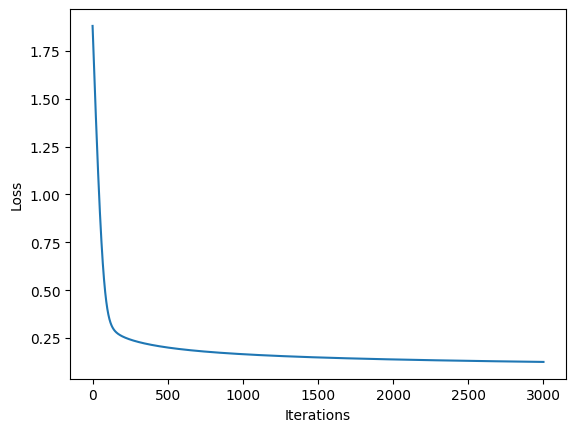

In [41]:
##Call the gradient_descent function here
##Plot the cost history here
max_its=3000
w=np.array([3.0,3.0])
alpha=0.1

w_history, c_history = gradient_descent(g=cross_entropy, alpha=alpha, max_its=max_its, w=w, x=x, y=y)
plt.plot(c_history)
plt.xlabel("Iterations")
plt.ylabel("Loss")

#### **Q5**) [[10 points]](https://) Implement a logistic regression classifier that takes in the learned weights and x as input and returns the probability of the positive class (note that this is just the output of the sigmoid applied to the linear combination of the x and w)

In [42]:
def logistic_regression(learned_w,x):
    #your code here
    return sigmoid(model(x=x, w=learned_w))

#### **Q6**) [[5 points]](https://) Use the learned weights from the last gradient descent run and the logistic regression function implemented above to plot the learned curve. You can use the linspace method (shown below) to generate a list of xs that you can use. You need to generate a y for each of the candidate xs using the logistic regression function and the learned weights. On the same figure, also plot the scatter plot from Q3.


In [43]:
s = np.linspace(np.min(x),np.max(x))

print(f"shape of linspace: {s.shape}")

s_expanded = np.expand_dims(s, axis=0)

print(f"shape of linspace after we expand it: {s_expanded.shape}")

y_hat = np.squeeze(logistic_regression(learned_w=w_history[-1], x=s_expanded))


shape of linspace: (50,)
shape of linspace after we expand it: (1, 50)


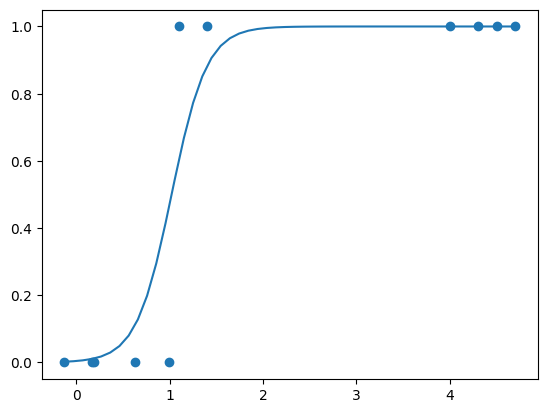

In [44]:
plt.plot(s, y_hat)
plt.scatter(x,y)

#### **Q7**) [[10 points]](https://) Find the decision boundary of the logistic regression model using the learned weights from the last gradient descent run. Note that, since we have only one feature, the decision boundary will be a point. Utilize the linspace function to identify the x-value where the model's output is closest to 0.5.

In [45]:
s = np.linspace(np.min(x),np.max(x), 1000) # sample points evenly spaced

s_expanded = np.expand_dims(s, axis=0)
y_hat = np.squeeze(logistic_regression(learned_w=w_history[-1], x=s_expanded))
transformed_yhat = np.abs(y_hat - 1/2)

boundary = s[np.argmin(transformed_yhat)]
boundary


1.021102406798222

#### **Q8**) [[5 points]](https://) Slightly modify the logistic regression model above so that it returns a 1 or 0 based on the specified threshold.

In [46]:
def logistic_regression_modified(learned_w,x, threshold):
    ##Your code here
    predictions = [] # better to use np.where
    for pred in logistic_regression(learned_w, x):
        if pred > threshold: predictions.append(1)
        else: predictions.append(0)

    return np.array(predictions)

#### **Q9**) [[20 points]](https://) Write a function (called evaluate) that takes in actual and predicted ys (for a binary classification problem) and return a confusion matrix and the accuracy. Use the modified logistic regression model and the evaluate function below to report the confusion matrix and accuracy for the x and y used for our training at a threshold of 0.5.  

In [47]:
def evaluate(y_actual,y_pred):
    
    # where do y and yhat both equal 0 / total = true neg
    # where do y and yhat both equal 1 / total = true pos
    # where do y=1 and yhat=0 / total = false neg
    # where do y=0 and yhat=1 / total = false pos

    true_positive = np.sum(np.bitwise_and(y_actual, y_pred))
    print(true_positive)
    true_negative = np.sum(np.bitwise_and(np.logical_not(y_actual), np.logical_not(y_pred)))
    print(true_negative)
    false_positive = np.sum(np.bitwise_and(np.logical_not(y_actual), y_pred))
    false_negative = np.sum(np.bitwise_and(y_actual, np.logical_not(y_pred)))

    accuracy = (true_positive + true_negative) / y_actual.size
    return false_positive, false_negative, true_positive, true_negative, accuracy

In [48]:
csvname = '2d_classification_data_v1_entropy.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:]
y

array([[0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.]])

In [49]:
y_hat = logistic_regression_modified(learned_w=w_history[-1], x=x, threshold=0.5)
y = y[0].astype("int32")

evaluate(y,y_hat)

6
5


(0, 0, 6, 5, 1.0)

#### **Q10**) [[20 points]](https://) Implement the perceptron cost function from the class (the smooth ReLU version). Note that the perceptron cost also uses the linear model (the model function from question 2).

In [50]:
def perceptron_cost(w,x,y):
    ##Your code here
    return np.mean(np.log(1 + np.exp(-y * model(x,w))))

#### **Q11**) [[10 points]](https://) Run gradient descent function using the perceptron cost and the x and y from above and the parameters set to:
`max_its=3000, w=[3.0,3.0], alpha=0.1`
#### Save the cost and weight history returned by the gradient descent function. Plot the cost history. Note that for the perceptron, y values should be assigned as either -1 or 1.


In [51]:
y_perception = y.copy()

for i in range(y_perception.size):
    if y_perception[i] == 0: y_perception[i] = -1
y_perception # makign the other classes to be -1 instead of 0

array([-1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1], dtype=int32)

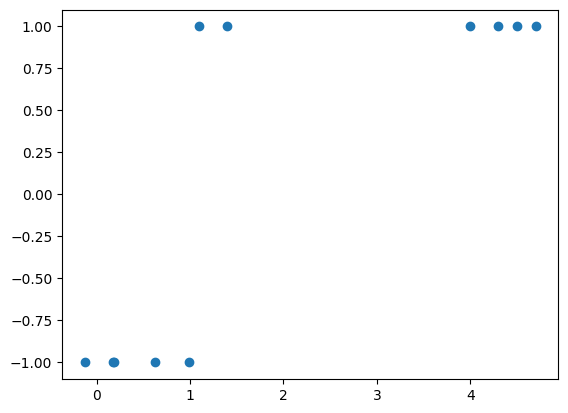

In [52]:
plt.scatter(x,y_perception)

Text(0, 0.5, 'Loss')

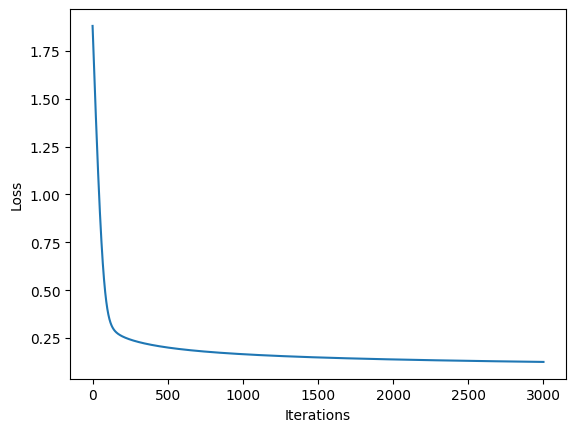

In [53]:
##Call the gradient_descent function here
##Plot the cost history here

max_its=3000
w=np.array([3.0,3.0])
alpha=0.1

w_history, c_history = gradient_descent(g=perceptron_cost, alpha=alpha, max_its=max_its, w=w, x=x, y=y_perception)
plt.plot(c_history)
plt.xlabel("Iterations")
plt.ylabel("Loss")

#### **Q12**) [[10 points]](https://) Find the decision boundary of the perceptron model (i.e. tbe linear model from question 2) using the learned weights from the last gradient descent run. Note that, since we have only one feature, the decision boundary will be a point. Utilize the linspace function to identify the x-value where the model's output is closest to 0.

In [54]:
s = np.linspace(np.min(x),np.max(x), 1000)
s_expanded = np.expand_dims(s, axis=0)
##Your code here
yhat = model(s_expanded, w_history[-1]) # get predictions from model 

# want to find where this model is closest to zero
boundary_point = s[np.argmin(np.abs(yhat))]
boundary_point


1.021102406798222

#### **Q13**) [[5 points]](https://) Compare the two decision boundaries you found from Q7 and Q12. If they are similar (or dissimilar), provide your insights on why they appear alike (or different).

The boundaries learned by our models are the same. This makes sence because they are both solving the same problem of classification on the same dataset with convex objective functions

# SKLearn

#### **Q14**) [[2 points]](https://)  The file 'heart.csv' has 304 lines, each one corresponding to a data point. Each row (i.e., data point), has several columns. Read the data file. Note that the first line is the header describing each column.

In [55]:
##Your code here
import csv
#Your code here
csvname = 'heart.csv'
with open(csvname, mode='r') as file:
    reader = csv.reader(file, delimiter=',')
    file = list(reader)
    cols = file[0]
    data = np.array(file[1:])
    
print(cols)
print(len(data))
print(data[0])

['\ufeffage', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
303
['63' '1' '3' '145' '233' '1' '0' '150' '0' '2.3' '0' '0' '1' '1']


In [56]:
data = data.astype(float)

#### **Q15**) [[2 points]](https://) Use the data above to set y to be the "target" and X to be the remaining columns.

In [57]:
X = data[:,:-1]
y = data[:,-1]

#### **Q16**) [[2 points]](https://) Run the code below to import the logistic regression and the train_test split functions from sklearn. Split your data into 80% train 20% test.

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
##Your code here
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=42)

#### **Q17**) [[5 points]](https://) Use sklearn to fit a logistic regression model on your training set. Use all the default parameter. Do not evaluate at this point. (You can find out about sklearn logistic regression here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [59]:
##Your code here
linearModel = LogisticRegression()
linearModel.fit(x_train, y_train)

/Users/andrewkoulogeorge/Desktop/Dartmouth/Senior/W24/ML TA/3: Binary Classification/HW3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
print(len(x_test))
print(len(x_test[1]))

61
13


#### **Q18**) [[5 points]](https://) Use the .predict_proba function of the logistic regression model that you have learned on your X_test. Note that the .predict_proba function returns an array of tuples where each element corresponds to the predicted probability for class 0 and 1 of the data point.

In [61]:
##Your code here
predictions = linearModel.predict_proba(x_test)
predictions[:2,:]

array([[0.88146518, 0.11853482],
       [0.23209424, 0.76790576]])

#### **Q19**) [[2 points]](https://) Filter the predicted probabilties from the last question to an array containing only the probabilites for class 1. I.e., you should no longer have tuples.

In [62]:
##Your code here
class1_predictions = predictions[:,1]

#### **Q20**) [[8 points]](https://) Use the roc_curve function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) to plot the ROC curve for your predictions using the predicted probabilities for class 1 and your y_test (use the default parameters). Also, print out the thresholds generated by the roc_curve function.

In [63]:
from sklearn import metrics 
##Your code here
fpr, tpr, thresholds = metrics.roc_curve(y_test, class1_predictions)


Text(0, 0.5, 'True Positive rate')

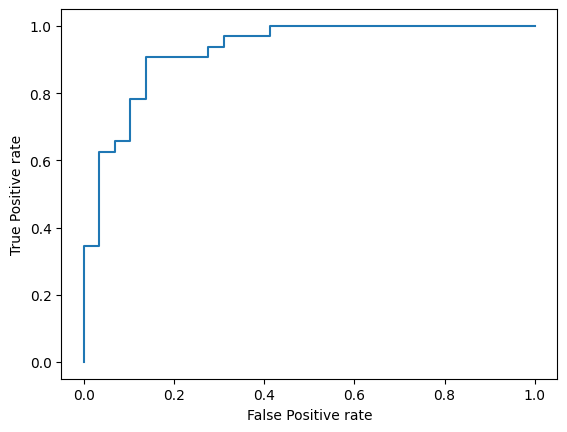

In [64]:
plt.plot(fpr, tpr)
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")

In [65]:
thresholds

array([           inf, 9.81177902e-01, 9.05782176e-01, 8.94163787e-01,
       8.02648548e-01, 7.98970702e-01, 7.92128786e-01, 7.67905761e-01,
       6.76945818e-01, 6.66830930e-01, 5.34465442e-01, 8.22375671e-02,
       8.01354457e-02, 7.77908341e-02, 7.25905768e-02, 5.18366783e-02,
       4.69066324e-02, 9.13585673e-04])

#### **Q21**) [[2 points]](https://) Use the roc_auc_score function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) to report the AUC score using the exact same setup as the last question.

In [66]:
##Your code here
metrics.roc_auc_score(y_test, class1_predictions)

0.9267241379310345